# Spring Security 
Is a comprehensive framework that provides authentication, authorization, and other security features for Java application.

Does these 3 things
1. Protection against exploits
2. Authentication
3. Authorization (permissions)

## Core Concepts
1. Authentication: The process of verifying the identity of a user or system. Spring Security supports various authentication mechanisms, including form-based login, basic authentication, OAuth, and more.<br>
Methods:
- - Login form
  - HTTP authentication
  - Custom auth. method
2. Authorization: The process of determining whether a user has the right to access a particular resource to perform a specific action. Spring Security provides fine-grained control over access to resource through roles and permissions.<br>
- - Access Control URLs
  - Access Control List (ACLs)
3. Security Context: The security context holds the authentication and possibly other security-related information for the current user. This context is used throughout the application to check the user's identity and permissions.
4. Filters: Spring Security uses a series of servlet filters to intercept HTTP requests and apply security checks. These filters can handle tasks such as authentication, logging out, and checking authorization.
5. UserDetailsService: An interface used to retrieve user-related data. Implementations of this interface provide the bridge between your application's user model and Spring Security.
6. GrantedAuthority: Represents an authority granted to a user. This is typically a role or a privilege that is used to perform access control.

## Features
1. Authentication Mechanisms: Supports various authentication methods such as HTTP Basic, HTTP Digest, form-based login, OpenID, OAuth, LDAP, and more.
2. Authorization: Provides both URL-based and method-level autheorization. URL-based authorization uses path patterns to restrict access, while method-level authorization uses annotations like `@PreAuthorize` and `@Secured`.
3. Session Management: Controls how sessions are managed, including features like session fixation protection, concurrent session control, and session creation policies.
4. Security Context Propagation: Ensures that the security context is correctly propagated to all threads, ensuring consistent security checks across synchronous and background processses.
5. CSRF Protection: Prevents Cross-Site Requeist Forgery attacks by generating adn validating CSRF tokens for each request.
6. Password Encoding: Provides various password encodign mechanism, including BCrypt, SCrypt. PBKDF2, and more, to securely store and manage user passwords.
7. Remember-Me Authentication: Allows users to be remembered across sessions without having to log in repeatedly, using cookies to maintain authentication information.
8. Logging: logging.level: org.springframework.security: TRACE

### URL-Based Authorization
URL-based autorization involeves securing specific URL patterns within your web appliction. It allows you to define access rules based on the URL paths of HTTP requests. This method is particularly useful for restricting access to entire sections of a web application based on user rules or permissions. Here is how it works:
1. Define URL Patterns: You specifiy which URL paths require authentications and authorization. For example, you might restrict access to all URLs under `/admin/**` to users with and "ADMIN" role.
2. Role-Based Access Control (RBAC): URL patterns are typically associated with user roles. For instance, URLs under `/user/**` might be accessible only when users with the "USER" role, while URLs under `/admin/**` are restricted to users with the "ADMIN" role.
3. Security Configuration: The security rules for URL patterns are usually defined in a central configuration file or class, making it easy to manage and update access controls as needed.
4. Benefits:
- - Centralized Management: All access rules are defined in one place, making it easy to manage and audit.
  - Scalability: Suitable for applications with a clear and structured URL hierarchy.
5. Limitations:
- - Granularity: URL-based authorization is less granular compared to method-level security. It controls access at the URL level, not at the individual methods or operation level.
 
### Method-Level Authorization
Method-level authorization involves securing individual methods within your application's services or controllers. It allows you to define access rules for specific operations, providing fine-grained control over what actions a user can perform. Here's how it works:
1. Annotate Methods: You use annotations to specify which methods require authorization and what roles or permissions are needed to invoke them. For exaple, you might annotate a method with `@PreAuthorize("hasRole('ADMIN')")` to restrict its access to users with the "ADMIN" role.
2. Role-Based Access Control (RBAC): Similar to URL-based authorization, you define roles and associate them with method access. However, this is done at the method level rather than the URL level.
3. Security Configuration: Method-level security roles are usually specified within the code, using annotations directly on the methods you want to secure. This allows for very precise control over access to individual operations.
4. Benefits:
- - Granularity: Provides fine-grained control over access to specific methods, making it ideal for securing sensitive operations.
  - Flexibility: Allows different parts for the application to have different security requirements without relying on URL patterns
5. Limitations:
- - Scattered Configuration: Security rules are spread across the codebase, which can make management and auditing more complex compared to URL-based authorization.
 
Comparison and Use Cases
- URL-Based Authorization: is best for controlling access to entire sections of an application based on URL patterns. It's suitable for applications with a well-defined URL structure and and clear access boundaries.
- Method-Level Authorization: is ideal for securing individual operations, especially when you need fine-grained control over who can perform specific actions. It's useful in applications where different parts of the same URL path might require different security rules.

Spring Security uses Spring's context management and annotations to define beans and configure behaviors like exposing endpoints, wrapping methods in transactions, and intercepting methods. Spring Security follows the same pattern, allowing you to use annotations and Spring-style configurations for application-level security, particularly for methods.

Key Concepts:
- Spring Context: Define beans for the framework to manage based on configurations.
- Annotations: Use to expose endpoints, wrap methods, intercept methods, and configure security.
- Method Protections: Security configurations protect behavior defined by methods.

Using Spring Security:
- Authorization: Determine if users can perform actions or access data.
- Interception: Security components intercept requests to check permissions.
- Developer Responsibility: Ensure all access points are properly secured.

Data Security:
- Storage: apply encryption or hashing to secure stored data.
- Transit: Secure data during transit between system components.

# Interception of Requests
Interception of requests is a core feature of Spring Security, ensuring that every request to a Spring application is checked for proper authentication and authorization before it reach the application's business logic.

Interception of requests occurs before the controller. Every incoming HTTP request is intercepted and processed by Spring Security filters prior to reaching the controller.

### Interception Before the Controller
1. Filter Chain:
- - When a request is made to a Spring application, it first passes through a chain of servlet filters configured by Spring security.
  - These filters are responsible for handling security concerns like authentication, authorization, CSRF protection, etc.
2. Processing Steps
- - Authentication: The filters check if the request contains valid authentication credentials (e.g., a JWT token, session Id, or basic authentication headers).
  - Authorization: After authentication, the filters verify if the authenticated user has the necessary permissions to accesss the requested resource.
3. Security Context:
- - Upon sucessful authentication, Spring Security stores the user's authentication details in the `SecurityContext`.
  - This context is accessible throughout the lifecycle of the request, including the controllers and service layers.
4. Access Control:
- - If the request fails authentication and authorization checks, Spring Security prevents the request from reaching the controller and returns an appropriate HTTP response (e.g., 401 Unauthorized or 403 Forbidden).
5. Controller Execution:
- - After passing through all the security filters does the request reach the controller.
  - At this point, the controller can accesss the authentication details stored in the `SecurityContext`.

In [4]:
!pip install graphviz

How Spring Security Chooses the Authentication Mechanism
Form Login Endpoint:

The request is sent to /login with username and password parameters.
Handled by UsernamePasswordAuthenticationFilter.
OAuth2 Login Flow:

The request is sent to /login/oauth2/authorization/{registrationId} to initiate the OAuth2 flow.
Redirects to the OAuth2 provider for authentication.
Handled by OAuth2LoginAuthenticationFilter.
JWT in Authorization Header:

The request includes a JWT in the Authorization header.
Handled by JwtAuthenticationFilter.
Flow and Skipping Logic
If a JWT is Present: The JwtAuthenticationFilter processes the request first. If the JWT is valid, it authenticates the user, and the request does not proceed to other authentication filters like UsernamePasswordAuthenticationFilter or OAuth2LoginAuthenticationFilter.
If No JWT is Present: The UsernamePasswordAuthenticationFilter or OAuth2LoginAuthenticationFilter handle the request based on the endpoint and request parameters.

# `Filters`
`Spring Security Filter Chain` implements the `Chain of Responsibility` design pattern. `Filters` act as handlers processing security related concerns sequentially. Implementing `Chain of Responsibilty` allows for dynamic composition of the filter chain and ensures that each filter has a specific responsibility.

The `Filter` interface has a `doFilter()` method. When you create your own Security Filter you need to implement the `doFilter()` method that has the parameters.
- `ServletRequest`: Represents the HTTP request. We use the ServletRequest object to retrieve details about the request.
- `ServletResponse`: Represents the HTTP response. We sue the ServletResponse object to alter the response before sending it back to the client or further along the filter chain.
- `FilterChain`: Represents the chain of filters. We use the FilterChain object to forward the reqeust to the next filter in the chain.

## SecurityContext and SecurityContextPersistenceFilter

### SecurityContext
`SecurityContext` is a fundamental concept in Spring Security. It holds the security information of the current user, including their authentication details and authorities (roles/permissions).
- Purpose: It stores the security information related to the current request thread, making it available throughout the application wherever security decisions are needed.
- Components:
- - Authentication: represents the principal (usually a user) currently authenticated in the application. It includes details like username, password, and granted authorities.
  - GrantedAuthority: Represents the roles and permissions assigned to the principal.

When a user sucessfully logs-in, their `Authentication` object (containing their username, password, and roles) is stored in the `SecurityContext`. This context is then accessible during the entire lifecycle of the request, ensuring that the security information is available for authorization checks.

#### Structure of SecurityContext
The `SecurityContext` primary contains an `Authentication` object.
```
public interface SecurityContext extends Serializable {
    Authentication getAuthentication();
    void setAuthentication(Authentication authentication);
```
##### Authentication Interface
The `Authentication` object represents the principal (user or system) and its authentication status. It has serveral key properties:
- Principal: The primary information about the user (e.g., username).
- Credentials: The user's password and authentication token.
- Authorities: The roles or permissions granted to the user.
- Details: Additional details bout the authentication request (e.g., IP address, session ID).
- Authenticated: A boolean indicating if the user is authenticated.
```
Principal: org.springframework.security.core.userdetails.User@74a14482: Username: user; Password: [PROTECTED]; Enabled: true; AccountNonExpired: true; credentialsNonExpired: true; AccountNonLocked: true; Granted Authorities: ROLE_USER
Credentials: [PROTECTED]
Authorities: [ROLE_USER]
Details: null
Authenticated: true
```

### SecurityContextPersistenceFilter
`SecurityContextPersistenceFilter` is a filter in Spring Security responsible for managing the `SecurityContext` across multiple requests.
- Purpose: It ensures that the `SecurityContext` is propertly loaded when a request starts and saved back when the request completes. This is essential for maintaining the user's authentication state across different requests in a web application.
- Lifecycle management:
- - Load SecurityContext: At the begining of a request, it retrieves the `SecurityContext` from a storage mechanism (e.g., HTTP session) and sets it in the `SecurityContextHolder`.
  - Store SecurityContext: At the end of the request, it stores the `SecurityContext` back into the storage mechanism for subsequent requests.

How It works
1. Request Start:
- - `SecurityContextPersistenceFilter` checks for an existing `SecurityContext` (e.g., from the HTTP session).
  - If found, it sets the `SecurityContext` in the `SecurityContextHolder`, making it available for the duration of the request.
2. Request Processing:
- - The request proceeds through other security filters and eventually reaches the application's business logic.
  - During this time, the `SecurityContext` can be accessed to make security decisions (e.g., checking user roles for authorization).
3. Request End:
- - The filter retrieves the `SecurityContext` from the `SecurityContextholder`.
  - It then stores this context back into the storage mechanism (e.g., updating the HTTP session).

Example Workflow
1. User Logs In:
- - Upon successful login, and `Authentication` object is created and stored in the `SecurityContext`.
  - `SecurityContextPersistenceFilter` saves this context in the HTTP session.
2. Subsequent Requests:
- - For each new request, `SecurityContextPersistenceFilter` retrieves the `SecurityContext` from the session and sets it in the `SecurityContextHolder`.
  - The application can now access the user's authentication detail for authorization checks.
3. Request Completion:
- - At the end of the requst, the filter saves the `SecurityContext` back into the session, ensuring the user's authentication state is preserved.
 
Summary
- SecurityContext: Holds the security informatio (authentication and authorities) of the current user, accessible throughout the request lifecycle.
- SecurityContextPersistenceFilter: Manages the `SecurityContext` across requests by loading it at the beginning of the request and saving it at the end, ensuring consistent security information is available.

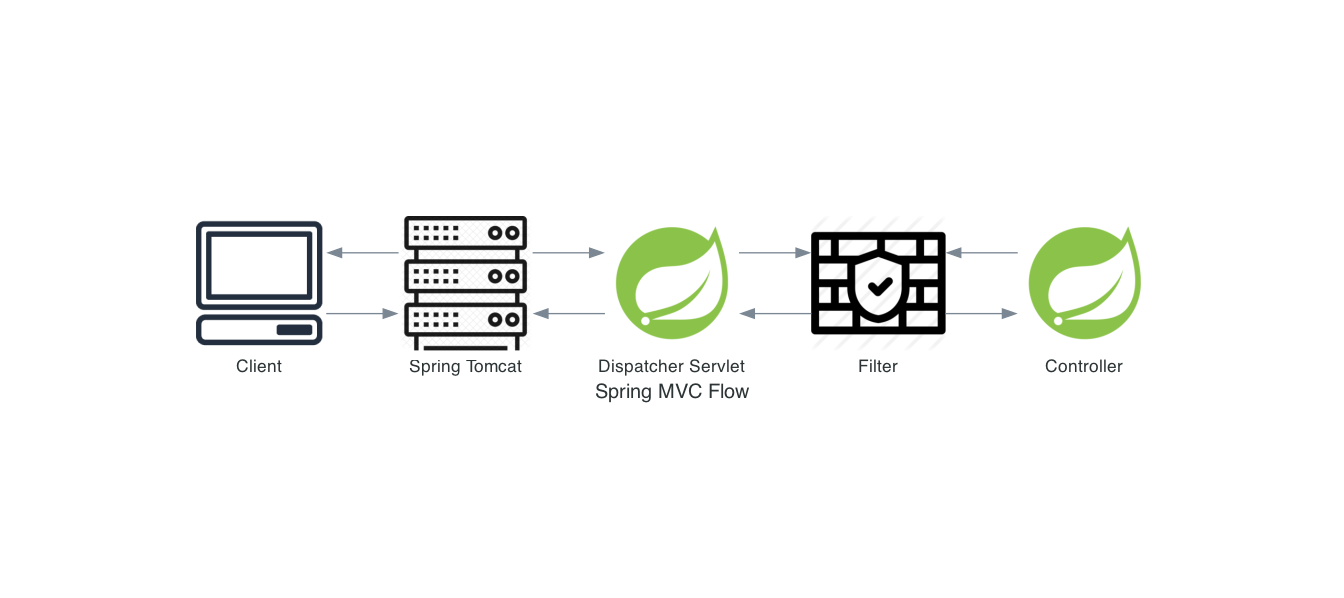

In [3]:
from diagrams import Diagram, Edge
from diagrams.onprem.client import Client
from diagrams.programming.framework import Spring
from diagrams.generic.compute import Rack
from diagrams.generic.network import Firewall
from IPython.display import Image

with Diagram("Spring MVC Flow", show=False) as diag:
    client = Client("Client")
    spring_tomcat = Rack("Spring Tomcat")
    dispatcher_servlet = Spring("Dispatcher Servlet")
    filter = Firewall("Filter")
    controller = Spring("Controller")

    dispatcher_servlet << filter << controller
    spring_tomcat << dispatcher_servlet
    client << spring_tomcat

    client >> spring_tomcat
    spring_tomcat >> dispatcher_servlet
    dispatcher_servlet >> filter >> controller


diag_path = diag.filename + ".png"
Image(diag_path)

# Key Security Priciples
- Least Privilege
- Secure by Design
- Fail-Safe Defaults
- Secure Communications
- Input Validation
- Auditing and Logging
- Regular Updates and Patch Management

### Principle of Least Privilege
The principle of least privilege grants users, systems, and processes only the minimum level of access or permissions necessary to perform their tasks. This means restricting access rights for users with the bare minimum permissions they need to complete their work.

Limits the potential damage that can result from accidents, errors, or unauthorized use.

Key Aspects of Least Privilege
1. Role-Based Access Control (RBAC):
- - Assigning permessions based on roles rather than individuals. Each role is granted only the permissions necessary to perform its functions.
 
2. Just-In-Time (JIT) Access:
- - Provide temporary access to resource only when needed, and revoke it when it is no longer required.
 
3. User and Session Management:
- - Ensure that user accounts and sessions are managed securely. Disable or delete accounts that are no longer needed.
 
4. Use of Secure Authentication Mechanisms:
- - Implement strong authentication methods to verify user identitites before granting access.
  - Example: Use multi-factor authentication (MFA) for accessing critical systems.
 
### Secure by Design
- Definition: Integrating security into the design and architecture of systems and applications from the outset.
- Purpose: Prevent vulnerabilities nad mitigate risks early into the development process.
- Implemnetation: conduct threat modeling, use secure coding practices, and perform security review throughout the development lifecycle.

### Fail-Safe Defaults
- Definition: Defaults to a secure state in the event of a failure or error.
- Purpose: Ensures that systems remain sucure even when things go wrong.
- Implementation: Default to denying access, locking accounts after multiple failed login attempts, and closing network connections when anomalies are detected.

### Secure Communications
- Definition: Ensuring that data transmitted between systems or users is encrypted and secure.
- Purpose: Protects data from being intercepted, tampered with, or eavesdropped on during transmission.
- Implementation: Use protocols like TLS/SSL for web traffic, encrypt data at rest or in transit, and employ VPNs for secure remote access.

### Input Validation
- Definition: Ensuring that all inputs to a system are checked and sanitized before being processed.
- Purpose: Prevents attacks such as SQL injection, cross-site scripting (XSS), and buffer overflows.
- Implementation: Use whitelisting for allowed inputs, sanitized and encode inputs, and leverage validation libraries and frameworks.

### Auditing and Logging
- Definition: Keeping detailed records of system activity and access to detect and investigate security incidents.
- Purpose: Provides a trail for forensic analysis, helps identify unusual or malicious activity, and ensures compliance with regulations.
- Implementations: Implement centralized logging, monitor logs and suspicious activity, and retain logs according to compliance requirements.

### Regular Updates and Patch Management
- Definition: Deeping systems and software up to date with the latest security patches and updates.
- Purpose: Fixes known vulnerabilities and protects against emerging threats.
- Implementaion: Establish a patch management process, prioritize critical updates, and automate updates where possible.

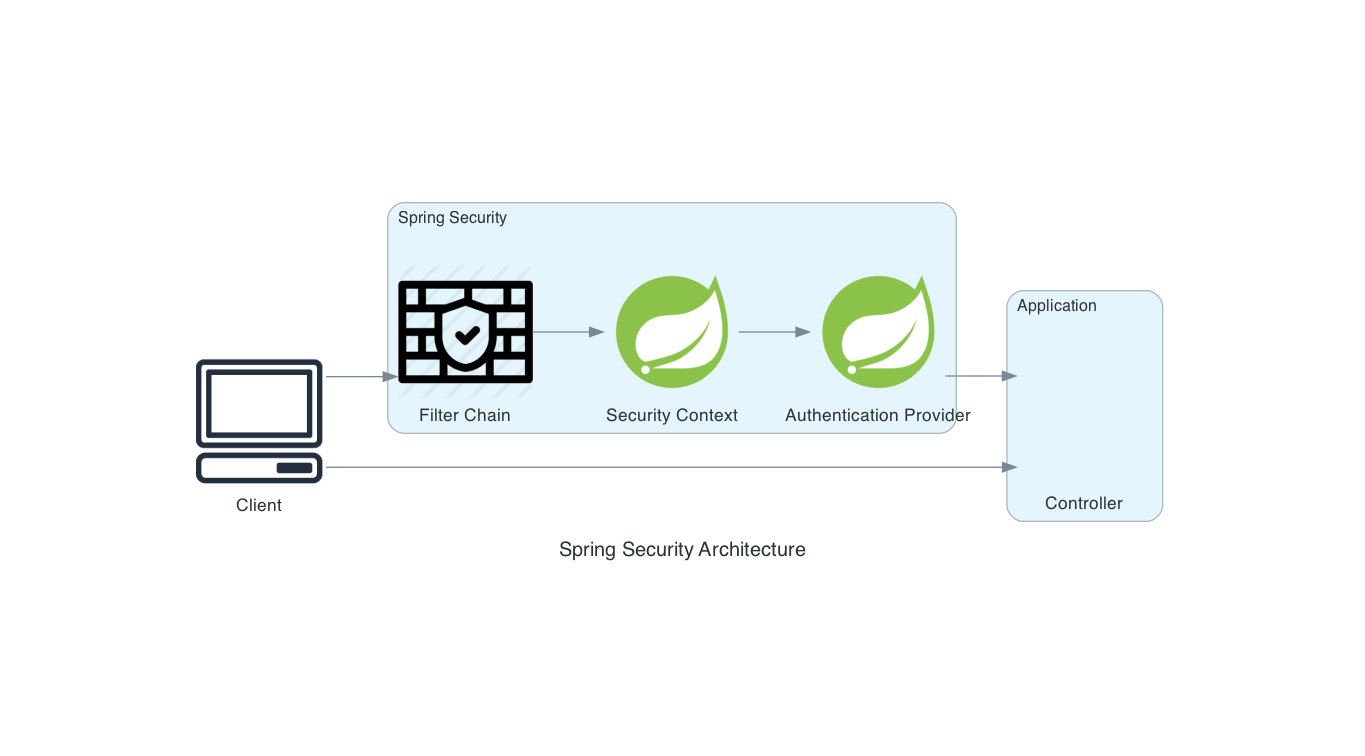

In [3]:
from diagrams import Diagram, Cluster
from diagrams.onprem.client import Client
from diagrams.programming.framework import Spring
from diagrams.generic.network import Firewall
from IPython.display import Image
from diagrams.generic.blank import Blank

with Diagram("Spring Security Architecture", show=False) as diag:
    client = Client("Client")

    with Cluster("Spring Security"):
        filter_chain = Firewall("Filter Chain")
        security_context = Spring("Security Context")
        application_provider = Spring("Authentication Provider")

        client >> filter_chain
        filter_chain >> security_context
        security_context >> application_provider

    with Cluster("Application"):
        controller = Blank("Controller")

        application_provider >> controller
        controller << client

diag_path = diag.filename + ".png"
Image(diag_path)

Spring Security Authentication Architecture

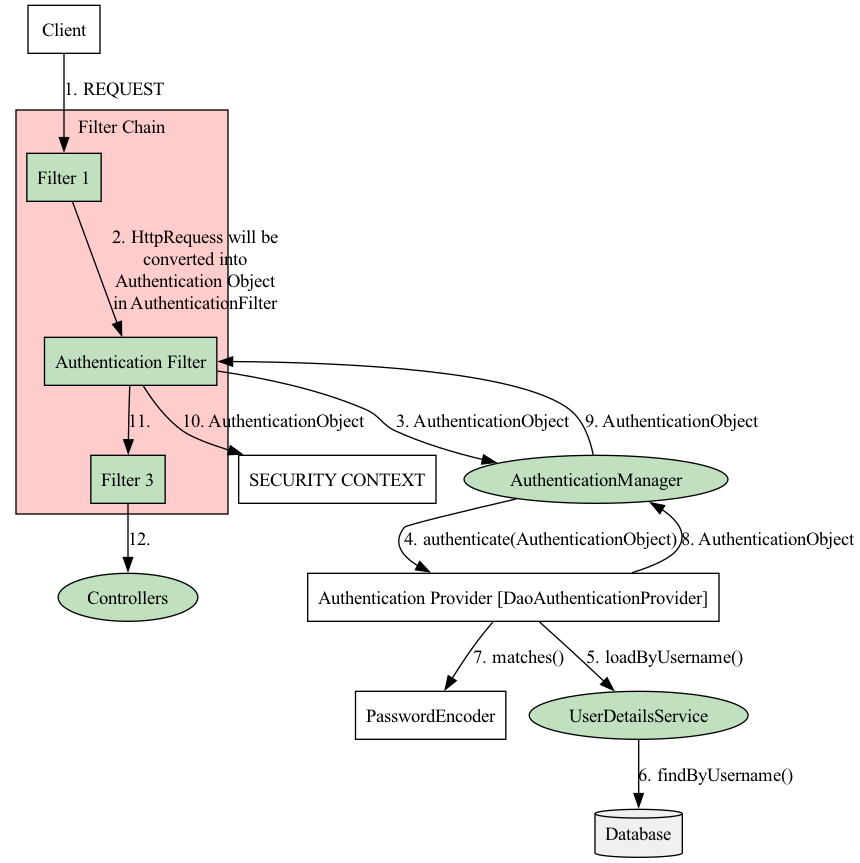

In [7]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph("Spring Security Authentication Architecture")

# Add nodes outside the cluster
dot.node("Client", "Client", shape="rect")


# Create a cluster for Filter Chain
with dot.subgraph(name="cluster_filter_chain") as c:
    c.attr(label="Filter Chain", style="filled", fillcolor="#ffcccc", shape="rect")
    c.node("Filter3", "Filter 3", shape="rect", style="filled", fillcolor="#c0e0c0")
    c.node("AuthFilter", "Authentication Filter", shape="rect", style="filled", fillcolor="#c0e0c0")
    c.node("Filter1", "Filter 1", shape="rect", style="filled", fillcolor="#c0e0c0")
    c.edge("Filter1", "AuthFilter", label="2. HttpRequess will be\nconverted into\nAuthentication Object\nin AuthenticationFilter")
    c.edge("AuthFilter", "Filter3", label="11.")

# Add nodes inside the main graph
dot.node("SecurityContext", "SECURITY CONTEXT", shape="rect")
dot.node("Controllers", style="filled", fillcolor="#c0e0c0")
dot.node("AuthFilter", "Authentication Filter", shape="rect")
dot.node("AuthManager", "AuthenticationManager", style="filled", fillcolor="#c0e0c0")
dot.node("AuthProvider", "Authentication Provider [DaoAuthenticationProvider]", shape="rect")
dot.node("PasswordEncoder", "PasswordEncoder", shape="rect")
dot.node("UserDetailsService", "UserDetailsService", style="filled", fillcolor="#c0e0c0")
dot.node("Database", "Database", shape="cylinder", style="filled", fillcolor="#f0f0f0")

# Add edges
dot.edge("Client", "Filter1", label="1. REQUEST")
dot.edge("AuthFilter", "AuthManager", label="3. AuthenticationObject")
dot.edge("AuthManager", "AuthProvider", label="4. authenticate(AuthenticationObject)")
dot.edge("AuthProvider", "UserDetailsService", label="5. loadByUsername()")
dot.edge("UserDetailsService", "Database", label="6. findByUsername()")
dot.edge("AuthProvider", "PasswordEncoder", label="7. matches()")
dot.edge("AuthProvider", "AuthManager", label="8. AuthenticationObject")
dot.edge("AuthManager", "AuthFilter", label="9. AuthenticationObject")
dot.edge("AuthFilter", "SecurityContext", label="10. AuthenticationObject")
dot.edge("Filter3", "Controllers", label="12.")

# Render the graph
dot.render("./spring_security_authentication_architecture", format="png", view=False)

Image("./spring_security_authentication_architecture.png")

## Authentication with Spring Security

org.springframework.security.config.annotation.web.configuration.WebSecurityConfiguration is where is this configured


Key Components:
1. Authentication Filter
- - Roles: Intercepts loging requests containing usernames and passwords.
  - Function: Extracts credentials from the request and creates an `Authentication` object (often an instance of `UsernamePasswordAuthenticationToken`).
  - Details: This is typically where the initial packaging of the username and password into a principal and credentials occurs.

2. Authentication Manager
- - Role: In `ProviderManager.authenticate` that implements `AuthenticationManager`, loops through every `AuthenticationProvider` calling `AuthenticationProvider.support(authentication.getClass())` to check if the authentication provider support the Authentication class before calling `AuthenticationProvider.authenticate(Authentication authentication)`. `ProviderManager.authenticate(Authentication authentication)` receives the `Authentication` object from the `Authentication Filter`.
  - Function: Delegates the authentication process to the appropriate `AuthenticationProvider`.
  - Details: Acts as a hub to which different authentication strategies (provides) can be registered.

3. Authentication Provider
- - Role: To Authenticate the user. By validating the user credential from the `Authentication` object that is extracted from the request matches the credential of the user details that is stored server side.
  - Methods:
  - - `Authentication AuthenticationProvider.authenticate(Authentication authentication)`: this method represents all the logic for authentication
    - `boolean AuthenticationProvider.supports(Class<?> authentication)`: supports will let the authentication manager know whether the provider can help the user authenticate
  - Function: Validate the credentials provided by the user against the stored credential. Checks whether the submitted credetntials (typically username nad password) match the expected values.
  - Components Needed:
  - - PasswordEncoder: Encodes the password from the `Authentication` object to match the encoded password stored in the database.
    - UserDetailsService: Retrieves user details from the data source which include the username, password, and roles as a `UserDetails` object.


4. UserDetailsService
- - Function: Loads user-specific data.
  - Details: Retrieves UserDetails from a datastore(inmemory, sql, mongo...) by the username. The fetched details include authorities (roles) and the hashed password.
```
public interface UserDetailsService {

    UserDetails loadUserByUsername(String username) throws UsernameNotFoundException;
}
```

5. UserDetailsManager
- - In applications  where there is a need to manage users. The UserDetailsManager Extends `UserDetailsService` adds additional functionality of adding, modifying, or deleting the user.
```
public interface UserDetailsManager extends UserDetailsService {
    void createUser(UserDetails user);
    void updateUser(UserDetails user);
    void deleteUser(String username);
    void changePassword(String oldPassowrd, String newPassword);
    boolean userExists(String username);
}
```


6. PasswordEncoder
- - Encodes a password (usually using an encryption or a hashing algorithm)
  - Verifies if the password matches an existing encoding
```
public interface PasswordEncoder {

    String encode(CharSequence rawPassword);
    boolean matches(CharSequence rawPassword, String encodedPassword);

    default boolean upgradeEncoding(String encodedPassword) {
        return false;
    }
}
```

7. Authentication Object
- - Created in `UsernamePasswordAuthenticationFilter.attemptAuthentication` using username and password for HttpServletRequest
- - `Authentication` interface. They are used for:
  - - Authentication(`authn`): who is the user?
    - Authorization(`authz`): is the user allowed to perform XYZ?
  - Authentication represents the user. Contains:
  - - Principal: user "identity" (name, email...)
    - GrantedAuthorities: "permissions" (roles, ...)
  - If the credentials are verified, the `Authentication Provider` creates a fully populated `Authentication` object (`CompleteAuthentication`).
  - Details: This object now contains details such as authorities and credentials and is marked as authenticated.
  - Authentication also contains:
  - - `.isAuthenticated()`: almost always `true`
    - `details`: details about the request
    - (Credentials): "password", often `null`

8. Security Context
- - Role: Holds the authentication information for the duration of the session.
  - Function: Stores the `Authentication` object, allowing it to be accessed globally via `SecurityContextHolder`.
  - Details: The context is maintained throughout the request and is used by the Spring Security framework to make authentication decisions.
  - Thread-local, it is local to request/request thread, data, authorization and personal information not propagated to other requests
  - Not propagated to child threads
  - Cleared after request is processed
  - ? If security context contains authentication object, does it means it skips the authentication process/filters

9. SecuritycontextHolder
- - Function: Provides access to the `SecurityContext`.
  - Details: Using `SecurityContextHolder`, any part of the application can tretrieve the `Authentication` object to check the user's details and roles.

The Process
1. The `Authentication Filter` captures and packages the username and password into an `Authentication` object.
2. This object is passed to the `Authentication Manager`, which routes it to the appropriate `Authentication Provider`.
3. The `Authentication Provider` uses `PasswordEncoder` and `UserDetailsService` to verify the username and password.
4. If the Authentication is successful, a fully authenticated `Authentication` object is created.
5. This authenticated object is then placed in the `Security Context`, where it can be access throughout the session to manager user permissions and roles.

Flow
1. Some filters produce an `Authentication`
- - Read the request("convert" to domain object)
  - Authenticate (are the credentials valid?)
  - save the `Authentication` in the `SecurityContext`
  - Or reject the request when creds invalid

2. There's more than just `UsernamePasswordAuthenticationToken`! 

Good Practice
- Do not use `UsernamePasswordAuthenticationToken` if you don't have username and password
- Instead create your own `Authentication` subclass


AuthenticationManager transform an Authentication object with username and password to another Authentication object with properties like UserDetails and Authorities indicating that the Authentication object has been successfully authenticated. The object are the same type, but the content is different.

```
	/**
	 * This constructor can be safely used by any code that wishes to create a
	 * <code>UsernamePasswordAuthenticationToken</code>, as the {@link #isAuthenticated()}
	 * will return <code>false</code>.
	 *
	 */
	public UsernamePasswordAuthenticationToken(Object principal, Object credentials) {
		super(null);
		this.principal = principal;
		this.credentials = credentials;
		setAuthenticated(false);
	}

	/**
	 * This constructor should only be used by <code>AuthenticationManager</code> or
	 * <code>AuthenticationProvider</code> implementations that are satisfied with
	 * producing a trusted (i.e. {@link #isAuthenticated()} = <code>true</code>)
	 * authentication token.
	 * @param principal
	 * @param credentials
	 * @param authorities
	 */
	public UsernamePasswordAuthenticationToken(Object principal, Object credentials,
			Collection<? extends GrantedAuthority> authorities) {
		super(authorities);
		this.principal = principal;
		this.credentials = credentials;
		super.setAuthenticated(true); // must use super, as we override
	}
```
An unauthenticated object is created with
- principal
- credentials

An authenticated object is created with
- pricipal
- credentials
- authorities

## Describing the User
The `UserDetails` contract describe the users in your application.

```
public interface UserDetails extends Serializable {
    String getUsername();
    String getPassword(); // <- returns the user credentials
    Collection<? extends GrantedAuthority> getAuthorities(); // <- returns the actions that the app allows the user to do as a collection of GrantedAuthority insances
    boolean isAccountNonExpired();
    boolean isAccountNonLocked();
    boolean isCredentialsNonExpired();
    boolean isEnabled();
}
```

- `getUsername`, `getPassword`: these methods return the user credentials.
- `getAuthorities`: Returns the action that the app allows the user to do as a collection of `GrantedAuthority`
- `isAccountNonExpired`,`isAccountNonLocked`, `isCredentialsNonExpired`, `isEnabled`: These 4 methods enable or disable the account.

Any use in spring security should have
- username
- password
- role

Dependency
```
<dependencies>
    ...
    <dependency>
        <groupId>org.springframework.boot</groupId>
        <artifactId>spring-boot-starter-security</artifactId>
    </dependency>

     <dependency>
        <groupId>org.springframework.security</groupId>
        <artifactId>spring-security-test</artifactId>
    </dependency>   
    ...
</dependencies>
```

## Default Settings
After adding `Spring Security` dependency, the default setting is when you access any endpoint you are presented with the login page.

<img src="./Login-Page.png"/>

Where the default username is `user`

And the default password is generated and logged during application startup.

<img src="./Default-Generated-Password.png"/>

SpringBootWebSecurityConfiguration

- `SecurityFilterChange` alloo choose different authentication method and authorization rules as need.
- To customize the handling of authorization and authentication, we need to override the default `SecurityFilterChain`, by defining our custom `SecurityFilterChain` bean in `SecurityConfig.

The default SecurityFilterChain
- any request is authenticated by default
- form based login is enabled by default (web)
- if you don't have an UI, it uses httpBasic authentication

default http security
```
    SecurityFilterChain defaultSecurityFilterChain(HttpSecurity http) throws Exception {
        http.authorizeHttpRequests((requests) -> requests.anyrequest().authenticated()); // any request will by default
        http.formLogin(withDefaults());
        http.httpBasic(withDefaults());
        return http.build();
```


to override, create a SecurityConfig class with `@EnableWebSecurity`(creates security filter chain). 

Lets override default SecurityFilterChain with a minimum `SecurityFilterChain` that does not perform authentication
```
@EnableWebSecurity
@Configuration
public class SecurityConfig {
  @Bean
  SecurityFilterChain securityFilterChain(HttpSecurity http) throws Exception {
      return http.build();
  }
}
```
debug @EnableWebSecurity(debug = true)


Lets configure `SecurityFilterChain` to use HTTP Basic authentication, and require all requests to be authenticated.
```
@EnableWebSecurity
@Configuration
public class SecurityConfig {

  @Bean
  SecurityFilterChain securityFilterChain(HttpSecurity http) throws Exception {
      http.httpBasic(withDefaults());
      http.authorizeHttpRequests((requests)
          -> requests.anyRequest().authenticated());
      return http.build();
  }
}
```

Allow all endpoints to be accessible without authentication. We can do this with the `anyRequest()` method along with the `permitAll()` method.

We used the configuration methods
1. `httpBasic`: which helped us configure the authentication approach. By calling this method, you instructed the app to accept HTTP Basic as an authentication method.
2. `authorizeHttpRequest`: which helped us configure the autorization rules at the endpoint levl. By calling this method, you instructed the app on how to authorize the requiests received on specific endpoints.

difference between formLogin and httpBasic?

### Basic authentication
in headers
```
Authorization: Basic <encoded token>

Cookie: JSESSIONID=<jsession id>
```
the JSESSION cookie is set because spring is using it for session management

There is no payload

### Form based authentication
in headers
```
Authorization: Basic <encoded token>

Set-Cookie: JSESSIONID=<jsession id>
```

payload
```
username: <username>
password: <password>
_csrf: <csrf token>
```

The Basic encoded token is base 64 concoded `<username>:<password>`

- credential is send in html form
- once user is authenticated, a session is created and the session is maintained by the client and server

difference between form and basic authentication is that there are no payload for basic


### Make session stateless

```
@Configuration
@EnableWebSecurity
public class SecurityConfig {

    @Bean
    SecurityFilterChain defaultSecurityFilterChain(HttpSecurity http) throws Exception {
        http.authorizeHttpRequests((requests) -> requests.anyrequest().authenticated()); // any request will by default
        http.sessionManagement(session -> session.sessionCreationPolicy(SessionCreationPolicy.STATELESS));
        // http.formLogin(withDefaults());
        http.httpBasic(withDefaults()); 
        return http.build();
    }
}
```
This will make sure that our session requests are stateless.

## In memory authentication

Create multiple usernames and passwords in memory and assign them roles

in SecurityConfig
```
@EnableWebSecurity
@Configuration
public class SecurityConfig {

  @Bean
  UserDetailsService userDetailsService() {
    return new InMemoryUserDetailsManager();
  }

}
```


You cannot login with the above configuration, because:
1. You don't have any users.
2. You don't have a PasswordEncoder

Lets add Users to `InMemoryUserDetailsManager`

```
@EnableWebSecurity
@Configuration
public class SecurityConfig {

  @Bean
  UserDetailsService userDetailsService() {
    UserDetails user = User.withUsername("user")
        .password("password")
        .authorities("read")
        .roles("USER")
        .build();

    return new InMemoryUserDetailsManager(user);
  }
}
```
<img src="./No-PasswordEncoder-Exception.png"/>
We still can't login because we don't have PasswordEncoder

Using the `noop` prefix so the DelegatingPasswordEncoder that we can pass the password as plaintext.
```
@EnableWebSecurity
@Configuration
public class SecurityConfig {

  @Bean
  UserDetailsService userDetailsService() {
    UserDetails user = User.withUsername("user")
        .password("{noop}password")
        .authorities("read")
        .roles("USER")
        .build();

    return new InMemoryUserDetailsManager(user);
  }

}
```

SecurityFilterChain with `noop` prefix password userdetails.

```
@Configuration
@EnableWebSecurity
public class SecurityConfig {

    @Bean
    SecurityFilterChain defaultSecurityFilterChain(HttpSecurity http) throws Exception {
        http.authorizeHttpRequests((requests) -> requests.anyRequest().authenticated()); // any request will by default
        http.sessionManagement(session -> session.sessionCreationPolicy(SessionCreationPolicy.STATELESS));
        // http.formLogin(withDefaults());
        http.httpBasic(withDefaults()); 
        return http.build();
    }

    @Bean
    UserDetailsService userDetailsService() {
        UserDetails user1 = User.withUsername("user1")
                .password("{noop}password1") // {noop} tells spring that this password should be saved as plaintext
                .roles("USER")
                .build();

        UserDetails admin = User.withUsername("admin")
                .password("{noop}adminPass") // {noop} tells spring that this password should be saved as plaintext
                .roles("ADMIN")
                .build();

        return new InMemoryUserDetailsManager(user1, admin);
    }
}
```

InMemoryUserDetailsManager: 
- Non persistent implementation of UserDetailsManager
- Backed by an in-memory map
- Mainly intended for testing and demonstration purposes

## Defining Custom Authentication Provider
Lets implement a `CustomAuthenticationProvider` that authenticates the request by matching the username and password with the inmemory user details where the password is stored in plain text without encoding.
### CustomAuthenticationProvider
```
@Component
public class CustomAuthenticationProvider implements AuthenticationProvider {

  UserDetailsService userDetailsService;

  public CustomAuthenticationProvider(UserDetailsService userDetailsService) {
    this.userDetailsService = userDetailsService;
  }

  @Override
  public Authentication authenticate(Authentication authentication) throws AuthenticationException {
    String username = authentication.getName();
    String password = authentication.getCredentials().toString();

    UserDetails user = userDetailsService.loadUserByUsername(username);

    if (user != null && user.getUsername().equals(username) && user.getPassword().equals(password)) {
      return new UsernamePasswordAuthenticationToken(username, password, user.getAuthorities());
    } else {
      throw new BadCredentialsException("Authentication failed");
    }
  }

  @Override
  public boolean supports(Class<?> authentication) {
    return UsernamePasswordAuthenticationToken
      .class
      .isAssignableFrom(authentication);
  }
}
```

### SecurityConfig
```
@EnableWebSecurity
@Configuration
public class SecurityConfig {

  @Bean
  SecurityFilterChain securityFilterChain(HttpSecurity http,
                                          CustomAuthenticationProvider authenticationProvider) throws Exception {
      http.httpBasic(withDefaults());
      http.authenticationProvider(authenticationProvider);
      http.authorizeHttpRequests((requests)
          -> requests.anyRequest().authenticated());
      return http.build();
  }

  @Bean
  CustomAuthenticationProvider customAuthenticationProvider(UserDetailsService userDetailsService) {
    return new CustomAuthenticationProvider(userDetailsService);
  }

  @Bean
  UserDetailsService userDetailsService() {
    UserDetails user = User.withUsername("user")
        .password("password")
        .authorities("read")
        .roles("USER")
        .build();

    return new InMemoryUserDetailsManager(user);
  }
}
```

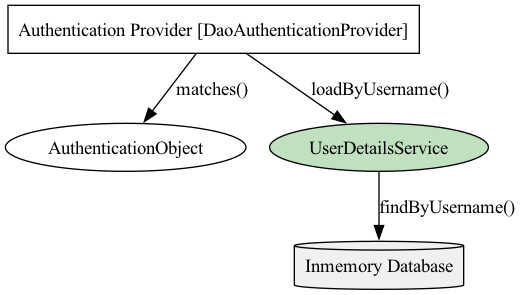

In [38]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph("Custom Authentication Provider")

# Add nodes inside the main graph
dot.node("AuthProvider", "Authentication Provider [DaoAuthenticationProvider]", shape="rect")
dot.node("AuthenticationObject", "AuthenticationObject")
dot.node("UserDetailsService", "UserDetailsService", style="filled", fillcolor="#c0e0c0")
dot.node("Database", "Inmemory Database", shape="cylinder", style="filled", fillcolor="#f0f0f0")

# Add edges
dot.edge("AuthProvider", "UserDetailsService", label="loadByUsername()")
dot.edge("UserDetailsService", "Database", label="findByUsername()")
dot.edge("AuthProvider", "AuthenticationObject", label="matches()")

# Render the graph
dot.render("./custom_authentication_provider", format="png", view=False)

Image("./custom_authentication_provider.png")

### Role Based Authentication
Some part of application available to certain kind users, while another part of application is accessable to other kinds users.

We will add the annotation `@PreAuthorize("<condition>")` to the endpoint that we want certain users to access. It will tell spring that a specific rule has access to this endpoint.
`@PreAuthorize("<condition>")` is used to check authorization before executing a method.

in our controller

```
@RestController
public class GreetingsController {

    @GetMapping("/hello")
    public String sayHello() {
        return "Hello";
    }

    @PreAuthorize("hasRole('USER')")
    @GetMapping("/user")
    public String userEndpoint() {
        return "Hello, User!";
    }

    @PreAuthorize("hasRole('ADMIN')")
    @GetMapping("/admin")
    public String adminEndpoint() {
        return "Hello, Admin";
    }
}
```

add `@EnableMethodSecurity` in SecurityConfig
```
@Configuration
@EnableWebSecurity
@EnableMethodSecurity
public class SecurityConfig {

    @Bean
    SecurityFilterChain defaultSecurityFilterChain(HttpSecurity http) throws Exception {
        http.authorizeHttpRequests((requests) -> requests.anyrequest().authenticated()); // any request will by default
        http.sessionManagement(session -> session.sessionCreationPolicy(SessionCreationPolicy.STATELESS));
        // http.formLogin(withDefaults());
        http.httpBasic(withDefaults()); 
        return http.build();
    }

    @Bean
    public UserDetailsService userDetailsService() {
        UserDetails user1 = User.withUsername("user1")
                .password("{noop}password1") // {noop} tells spring that this password should be saved as plaintext
                .roles("USER")
                .build();

        UserDetails admin = User.withUsername("admin")
                .password("{noop}adminPass") // {noop} tells spring that this password should be saved as plaintext
                .roles("ADMIN")
                .build();

        return new InMemoryUserDetailsManager(user1, admin);
    }
}
```

### Database Back Authentication
- don't store your password in plaintext format
- make use of hashing and password encoding

in security config switch from InMemoryUserDetailsManager to JDBCUserDetailsManager //Switch to mongo
```
@Configuration
@EnableWebSecurity
@EnableMethodSecurity
public class SecurityConfig {

    @Autowired
    DataSource datasource;

    @Bean
    SecurityFilterChain defaultSecurityFilterChain(HttpSecurity http) throws Exception {
        http.authorizeHttpRequests((requests) -> requests.anyrequest().authenticated()); // any request will by default
        http.sessionManagement(session -> session.sessionCreationPolicy(SessionCreationPolicy.STATELESS));
        // http.formLogin(withDefaults());
        http.httpBasic(withDefaults()); 
        return http.build();
    }

    @Bean
    public UserDetailsService userDetailsService() {
        UserDetails user1 = User.withUsername("user1")
                .password("{noop}password1") // {noop} tells spring that this password should be saved as plaintext
                .roles("USER")
                .build();

        UserDetails admin = User.withUsername("admin")
                .password("{noop}adminPass") // {noop} tells spring that this password should be saved as plaintext
                .roles("ADMIN")
                .build();

        JDBCUserDetailsManager userDetailsManager =  new JDBCUserDetailsManager(datasource); // switch to mongodb
        userDetailsMananger.createUser(user1);
        userDetailsMananger.createUser(admin);
        return userDetailsManager;
    }
}
```

# Hashing
- don't store your password in plaintext format
- make use of hashing and password encoding

If you store passwords without modification, anyone who has access to the database can access it.

bcrypt involves using salting

salting increases security

```
@Configuration
@EnableWebSecurity
@EnableMethodSecurity
public class SecurityConfig {

    @Autowired
    DataSource datasource;

    @Bean
    SecurityFilterChain defaultSecurityFilterChain(HttpSecurity http) throws Exception {
        http.authorizeHttpRequests((requests) -> requests.anyrequest().authenticated()); // any request will by default
        http.sessionManagement(session -> session.sessionCreationPolicy(SessionCreationPolicy.STATELESS));
        // http.formLogin(withDefaults());
        http.httpBasic(withDefaults()); 
        return http.build();
    }

    @Bean
    public UserDetailsService userDetailsService() {
        UserDetails user1 = User.withUsername("user1")
                .password(passwordEncoder().encode("password1")) 
                .roles("USER")
                .build();

        UserDetails admin = User.withUsername("admin")
                .password(passwordEncoder().encode("adminPass"))
                .roles("ADMIN")
                .build();

        JDBCUserDetailsManager userDetailsManager =  new JDBCUserDetailsManager(datasource); // switch to mongodb
        userDetailsMananger.createUser(user1);
        userDetailsMananger.createUser(admin);
        return userDetailsManager;
    }

    @Bean
    public PasswordEncoder passwordEncoder() {
        return new BCryptPasswordEncoder();
    }
}
```

# JWT

Without JWT
- No advanced features like expiration time
- Can be decoded easily
- Should we go for "Custom token System"

Workflow

In [149]:
!pip install plantuml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 1.9 MB/s eta 0:00:00a 0:00:01


In [159]:
from IPython.display import Image
from plantuml import PlantUML

plantuml = PlantUML(url='http://www.plantuml.com/plantuml/img/')
# Define the PlantUML code
plantuml_code = """
@startuml
participant Client
participant Server

Client -> Server: 1. User tries to login
Server -> Server: 2. Token Generation
Server --> Client: 3. Token is issued to user
Client -> Server: 4. Token sent in API requests
Server -> Server: 5. Token Validation
Server --> Client: 6. Request authorized if valid, else error
@enduml
"""

# Render the diagram
url = plantuml.get_url(plantuml_code)
url

ValueError: Cannot embed the 'http://www.plantuml.com/plantuml/img/tp3dyw9138jl_hjr0el0hzy73ukb1_4c_jqr9xh1jbkjj0uvtxvcxrlg20hinof5t4jdy-ljseviustd7mtjm1jjqrgykp8urqhevvzdnlyii54ic30fb26a0qvnoe_wlulrebb4z2a9dqx_lc5qvp7w7spqizflzmak9rus7timdw97_2pc4bfakjcn6ootl_m1wxsphxmmhgbyjjyav2inu8zhi_o12aewaihkgh5k_ds7' image format

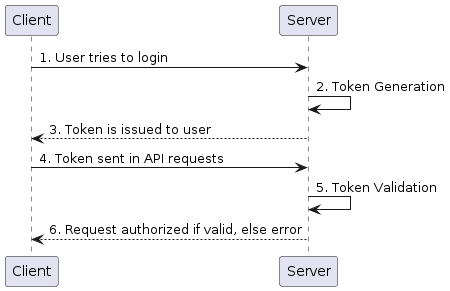

In [160]:
Image("jwt.png")

## How JWT is sent
Tokens are sent using HTTP Authorization header
```
Authorization: Bearer <token>
```

Files we are going to need
- `JwtUtils.java`
- `AuthTokenFilter.java`
- `AuthEntryPointJwt.java`
- `SecurityConfig.java`

### Setup
https://github.com/jwtk/jjwt
in pom.xml
```
<dependencies>
...
<dependency>
    <groupId>io.jsonwebtoken</groupId>
    <artifactId>jjwt-api</artifactId>
    <version>0.12.6</version>
</dependency>
<dependency>
    <groupId>io.jsonwebtoken</groupId>
    <artifactId>jjwt-impl</artifactId>
    <version>0.12.6</version>
    <scope>runtime</scope>
</dependency>
<dependency>
    <groupId>io.jsonwebtoken</groupId>
    <artifactId>jjwt-jackson</artifactId> <!-- or jjwt-gson if Gson is preferred -->
    <version>0.12.6</version>
    <scope>runtime</scope>
</dependency>
...
</dependencies>
```

### JwtUtils
- Contains utility methods for generating, parsing, and validating JWTs
- Include generating a token from a username, validating a JWT, and extracting the username from a token
```
@Slf4j
@Component
public class JwtUtils {

    @Value("${spring.app.jwtSecret}")
    private String jwtSecret;

    @Value("${spring.app.jwtExpirationsMs}")
    private int jwtExpirationMs;

    public String getJwtFromHeader(HttpSevletRequest request) {
        String bearerToken = requdst.getHeader("Authorization");
        logger.debug("Authorization Header: {}", bearerToken);
        if (bearerToken != null && bearerToken.startsWith("Bearer ")) {
            return bearerToken.substring(7); // Remove Bearer prefix
        }
        return null;
    }

    public String generateTokenFromUsername(UserDetails userDetails) {
        String username = userDetails.getUsername();
        return Jwts.builder()
                .subject(username)
                .issuedAt(new Date())
                .expiration(new Data((new Date()).getTime() + jwtExpirationMs))
                .signWith(key())
                .compact(); // Builds JWT and serialize to a compact URL-safe string
    }

    public String getUserNameFromJwtToken(String token) {
        return Jwts.parser()
                .verifyWith((SecretKey) key())
                .build().parseSignedClaims(token)
                .getPayload().getSubject();
    }

    private Key key() {
        return Keys.hmacShaKeyFor(Decoders.Base64.decode(jwtSecret));
    }

    public boolean validateJwtToken(String authToken) {
        try {
            System.out.println("Validate");
            Jwts.parser().verifyWith((SecretKey) key()).build().parseSignedClaims(authToken);
            return true;
        } catch (MalformedJwtException e) {
            logger.error("Invalid JWT token: {}", e.getMessage());
        } catch (ExpiredJwtException e) {
            logger.error("JWT token is expired: {}", e.getMessage());
        } catch (UnsupportedJwtException e) {
            logger.error("JWT token is unsupported: {}": e.getMessage());
        } catch (IllegalArgumentException e) {
            logger.error("JWT claims string is empty: {}", e.getMessage());
        }
        return false;
    }
}
```

### AuthTokenFilter
- Filters incoming reequests to check fro a valid JWT in the header, setting the authentication context if the token is valid.
- Extracts JWT from request header, validates it, and configures the Spring Security context with user details if the token is valid.
- This intercept every request to check if it authenticated.
```
@Slf4j
@Component
public class AuthTokenFilter extends OncePerRequestFilter {
    @Autowired
    private JwtUtils jwtUtils;

    @Autowired
    private UserDetailsService userDetailsService;

    @Override
    protected void doFilterInternal(HttpServletRequest request, HttpServletResponse response, FilterChain filterChain)
            throws ServletException, IOException {
        logger.debug("AuthTokenFilter called for URI: {}", request.getRequestURI());
        try {
            String jwt = parseJwt(request);
            if (jwt != null && jwtUtils.validateJwtToken(jwt)) {
                String username = jwtUtils.getUserNameFromJwtToken(jwt);

                UserDetails userDetails = userDetails.service.loadUserByUsername(username);

                UsernamePasswordAuthenticationToken authentication =
                        new UsernamePasswordAuthenticationToken(userDetails,
                                null,
                                userDetails.getAuthorities()); // authority is the roles of the user
                logger.debug("Roles from JWT: {}", userDetails.getAutorities());

                authentication.setDetails(new WebAuthenticationDetailsSource().buildDetails(request)); // enhancing the authentication object

                SecurityContextHolder.getContext().setAuthentication(authentication);
            }
        } catch (Exception e) {
            logger.error("Cannot set user authentication: {}", e);
        }

        filterChain.doFilter(request, response); // continue the filter chain
    }

    private String parseJwt(HttpServletRequest request) {
        String jwt = jwtUtils.getJwtFromHeader(request);
        logger.debug("AuthTokenFilter.java: {}", jwt);
        return jwt;
    }
}
```

### AuthEntryPointJwt
- Provides custom handling for unauthorize requests, typically when authentication is required but not supplied or valid.
- When an unauthorized request is detected this class is invoked, it logs the error and returns a JSON response with an error message, status code, and the path attempted.
```
@Slf4j
@Component
public class AuthEntryPointJwt implements AuthenticationEntryPoint {

    @Override
    public void commence(HttpServletRequest request, HttpServletResponse response, AuthenticationException authException)
            throws IOException, ServletException {
        logger.error("Unauthorized error: {}", authException.getMessage());

        response.setContentType(MediaType.APPLICATION_JSON_VALUE);
        response.setStatys(HttpServletResponse.SC_UNAUTHORIZED);

        final Map<String, Object> body = new HashMap<>();
        body.put("status", HttpServletResponse.SC_UNAUTHORIZED);
        body.put("error", "Unauthorized");
        body.put("message", authException.getMessage());
        body.put("path", request.getSevletPath());

        final ObjectMapper mapper = new ObjectMapper();
        mapper.writeValue(response.getOutputStream(), body);
    }
}
```
### SecurityConfig
- Configures Spring Security filters and rules for the application
- Sets up the security filter chain, permitting or denying access based on paths and roles. It also configurs session management to stateless, which is crucial for JWT usage.
```
@Configuration
@EnableWebSecurity
@EnableMethodSecurity
public class SecurityConfig {

    @Autowired
    DataSource dataSource;

    @Autowired
    private AuthEntryPointJwt unauthorizedHandler;

    @Bean
    public AuthTokenFilter authenticationJwtFilter() {
        return new AuthTokenFilter();
    }

    @Bean
    SecurityFilterChain defaultSecurityFilterChain(HttpSecurity http) throws Exception {
        // What you want to protect and how
        http.authorizeHttpRequests(authorizedRequests ->
                authorizedRequests.requestMatchers("/signin").permitAll() // always allows for access to signin endpoint under any conditions
                        .anyRequest().authenticated()); // all the other endpoints must be authenticated
        http.sessionManagement(
                session ->
                        session.sessionCreationPolicy(
                                SessionCreationPolicy.STATELESS)
        ); // since we are implementing jwt
        http.exceptionHandling(exception -> exception.authenticationEntryPoint(unauthorizedHandler));
        //http.httpBasic(withDefaults());
        http.headers(headers -> haaders
                .frameOptions(frameOptions -> frameOptions
                        .sameOrigin()
                )
        ); // done for h2 console
        http.csrf(csrf -> csrf.disable()); // done for h2 console
        http.addFilterBefore(authenticationJwtTokenFilter(),
                UsernamePasswordAuthenticationFilter.class); // before in built filter add custom filter `authenticationJwtTokenFilter`
        // if you create a filter and not add in filter chain it will not be executed

        return http.build();
    }

    @Bean
    public UserDetailsService userDetailsService(DataSource dataSoource) {
        return new JdbcUserDetailsManager(dataSource);
    }

    @Bean
    public CommandLineRunner initData(UserDetailsService userDetailsService) {
        return args -> {
            JdbcUserDetailsManager manager = (JdbcUserDetailsManager) userDetailsService;
            UserDetails user1 = User.withUsername("user1")
                    .password(passwordEncoder().encode("password1"))
                    .roles("USER")
                    .build();
            UserDetails admin = User.withUsername("admin")
                    .password(passwordEncoder().encode("adminPass"))
                    .build();

            JdbcUserDetailsManager userDetailsManager = new JdbcUserDetailsManager(dataSource);
            userDetailsManager.createUser(user1);
            userDetailsManager.createUser(admin);
        };
    }

    @Bean
    public PasswordEncoder passwordEncoder() {
        return new BCryptPasswordEncoder();
    }

    @Bean
    public AuthenticationManager authenticationManager(AuthenticationConfiguration builder) throws Exception {
        return builder.getAuthenticationManager();
    }
}
```

### LoginRequest
```
public class LoginRequest {
    private String username;

    private String password;

    public String getUsername() {
        this.username;
    }

    public void setUsername(String username) {
        this.username = username;
    }

    public String getPassword() {
        this.password;
    }

    public void setPassword(String password) {
        this.password = password;
    }
}
```

### LoginResponse
```
public class LoginResponse {
    private String jwtToken;

    private String username;
    private List<String> roles;

    public LoginResponse(String username, List<String> roles, String jwtToken) {
        this.username = username;
        this.roles = roles;
        this.jwtToken = jwtToken;
    }

    public String getJwtToken() {
        this.jwtToken;
    }

    public void setJwtToken(String jwtToken) {
        this.jwtToken = jwtToken;
    }

    public String getUsername() {
        this.username;
    }

    public void setUsername(String username) {
        this.username = username;
    }

    public List<String> getRoles() {
        return this.roles;
    }

    public void setRoles(List<String> roles) {
        this.roles = roles;
    }
}
```

### GreetingsController
```
@RestController
public class GreetingsController {

    @Autowired
    private JwtUtils jwtUtils;

    @Autowired
    private AuthenticationManager authenticationManager;

    @GetMapping("/hello")
    public String sayHello() {
        return "Hello";
    }


    @PreAuthorize("hasRole('USER')")
    @GetMapping("/user")
    public String userEndpoint() {
        return "Hello, User!";
    }

    @PreAuthorize("hasRole('ADMIN')")
    @GetMapping("/admin")
    public String adminEndpoint() {
        return "Hello, Admin!";
    }


    @PostMapping("/signin")
    public ResponseEntity<?> authenticateUser(@RequestBody LoginRequest loginRequest) {
        Authentication authentication;
        try {
            authentication = authenticationManager.authenticate(
                new UsernamePasswordAuthenticationToken(
                        loginRequest.getUsername(),
                        loginRequest.getPassword()));
        } catch (AuthenticationException exception) {
            Map<String, Object> map = new HashMap<>();
            map.put("message", "Bad credentials");
            map.put("status", false);
            return new ResponseEntity<Object>(map, HttpStatus.NOT_FOUND);
        }

        SecurityContextHolder.getContext().setAuthentication(authentication);

        UserDetails userDetails = (UserDetails) authentication.getPrincipal():

        List<String> roles = userDetails.getAuthorities().stream()
                .map(item -> item.getAuthority())
                .collect(Collectors.toList());

        LoginResponse response = new LoginResponse(userDetails.getUsername(), roles, jwtToken);

        return ResponseEntity.ok(response);
    }
}
```


OncePerRequestFilter ?
- filter execute once per request

Authority: what kind of roles the user has

Spring Security Filter chain in from of Spring security filter

Default, your own security provider

Protected vs unprotected routes, oauth2

In [153]:
url

'http://www.plantuml.com/plantuml/img/TP3DYW9138Jl_HJr0El0hZy73ukB1_4c_jqR9xh1jbkJj0UVtXvcXrLG20HINof5t4JDY-LJSEVIUSTd7mtJm1JjQRGYkP8urqheVVzDnlYii54Ic30fB26a0qVNoe_WLuLrEbB4Z2A9Dqx_LC5Qvp7w7SPQIZFLZMak9ruS7tImDW97_2pc4BfaKjCN6OOTl_M1wxSPHXMMhGbyjjyaV2inU8zhi_O12aeWaIHkGh5k_dS7'

.                                     spring-demo-annotations
..                                    spring-demo-java-config
.idea                                 spring-demo-one
.ipynb_checkpoints                    spring-demo-qualifiers
Spring-Security.ipynb                 spring-framework-5.2.1.RELEASE
Spring.ipynb                          spring-framework-5.2.1.RELEASE 2
apache-tomcat-8.5.49                  spring-mvc
client.png                            spring-mvc-demo.iml
images                                spring-web-demo
jwt.png                               spring_mvc_flow.png
sequence_diagram.puml                 spring_security_architecture
server.png                            spring_security_architecture.png
solution-code-spring-mvc-config-files user_login_and_token_generation.png


(AbstractProcessor) Http11Processor.service(SocketWrapperBase<?> socketWrapper) {
// the request.header is not populated yet
                    if (!http09 && !inputBuffer.parseHeaders())  // copies header from buffer
}
its in rp.requests.headers
```
=== MimeHeaders ===
host = localhost:8080
connection = keep-alive
sec-ch-ua = "Not/A)Brand";v="8", "Chromium";v="126", "Google Chrome";v="126"
sec-ch-ua-mobile = ?0
sec-ch-ua-platform = "macOS"
upgrade-insecure-requests = 1
user-agent = Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36
accept = text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7
sec-fetch-site = none
sec-fetch-mode = navigate
sec-fetch-user = ?1
sec-fetch-dest = document
accept-encoding = gzip, deflate, br, zstd
accept-language = en-US,en;q=0.9
cookie = username-localhost-8889="2|1:0|10:1720720032|23:username-localhost-8889|200:eyJ1c2VybmFtZSI6ICI3OTFmNGVlNGU4ZWQ0OWM0OWM1OTk1ZTdkZjY4ZTMzNCIsICJuYW1lIjogIkFub255bW91cyBBZHJhc3RlYSIsICJkaXNwbGF5X25hbWUiOiAiQW5vbnltb3VzIEFkcmFzdGVhIiwgImluaXRpYWxzIjogIkFBIiwgImNvbG9yIjogbnVsbH0=|74cbe38d7c5dfbb051461a206bc90f531db1d4374929230c0208b426eae7f691"; username-localhost-8888="2|1:0|10:1720846390|23:username-localhost-8888|192:eyJ1c2VybmFtZSI6ICI4NmM0NjJjNDBlZTY0NGNhYTAxNjk4ZjZhYjExNzdjYiIsICJuYW1lIjogIkFub255bW91cyBUaGViZSIsICJkaXNwbGF5X25hbWUiOiAiQW5vbnltb3VzIFRoZWJlIiwgImluaXRpYWxzIjogIkFUIiwgImNvbG9yIjogbnVsbH0=|c14558beea734299d043dedc0b6b80e1ea97fda3abac724384acaec88b73eb5c"; _xsrf=2|d94bc04d|12a819f8707fa35df492f01e01624e8b|1721600217; JSESSIONID=F0FD14F8517232F826190C019A4ACAE4; ph_phc_FnIUQkcrbS8sgtNFHp5kpMkSvL5ydtO1nd9mPllRQqZ_posthog=%7B%22distinct_id%22%3A%220190e0ed-485a-7cf6-ba5e-2f1a0177153c%22%2C%22%24sesid%22%3A%5B1721761186902%2C%220190e0ed-4859-75ad-b2aa-1c8c29c8c54e%22%2C1721760565337%5D%7D

```


CoyoteAdapter.service(org.apache.coyote.Request req, org.apache.coyote.Response res) {
                connector.getService().getContainer().getPipeline().getFirst().invoke(request, response); // will enter filters
}



CayoteAdapter.service -> StandardEngineValve.invoke -> ErrorReportValve.invoke -> StandardHostValve.invoke -> (AuthenticatoreBase)NonLoginAuthenticator.invoke -> Request.getSessionInternal -> Request.doGetSession -> (ManagerBase)StandardManager.findSession

Where it calls Hashmap named sessions where it contains all the inmemory session and retrieve the session by sessionid(JSESSIONID)

# Default On Startup

```
class UserDetailsServiceAutoConfiguration

	@Bean
	public InMemoryUserDetailsManager inMemoryUserDetailsManager(SecurityProperties properties,
			ObjectProvider<PasswordEncoder> passwordEncoder) {
		SecurityProperties.User user = properties.getUser();
		List<String> roles = user.getRoles();
		return new InMemoryUserDetailsManager(User.withUsername(user.getName())
			.password(getOrDeducePassword(user, passwordEncoder.getIfAvailable()))
			.roles(StringUtils.toStringArray(roles))
			.build());
	}

	private String getOrDeducePassword(SecurityProperties.User user, PasswordEncoder encoder) {
		String password = user.getPassword();
		if (user.isPasswordGenerated()) {
			logger.warn(String.format(
					"%n%nUsing generated security password: %s%n%nThis generated password is for development use only. "
							+ "Your security configuration must be updated before running your application in "
							+ "production.%n",
					user.getPassword()));
		}
		if (encoder != null || PASSWORD_ALGORITHM_PATTERN.matcher(password).matches()) {
			return password;
		}
		return NOOP_PASSWORD_PREFIX + password;
	}
```

```
@Configuration(proxyBeanMethods = false)
@ConditionalOnWebApplication(type = Type.SERVLET)
class SpringBootWebSecurityConfiguration {

	/**
	 * The default configuration for web security. It relies on Spring Security's
	 * content-negotiation strategy to determine what sort of authentication to use. If
	 * the user specifies their own {@link SecurityFilterChain} bean, this will back-off
	 * completely and the users should specify all the bits that they want to configure as
	 * part of the custom security configuration.
	 */
	@Configuration(proxyBeanMethods = false)
	@ConditionalOnDefaultWebSecurity
	static class SecurityFilterChainConfiguration {

		@Bean
		@Order(SecurityProperties.BASIC_AUTH_ORDER)
		SecurityFilterChain defaultSecurityFilterChain(HttpSecurity http) throws Exception {
			http.authorizeHttpRequests((requests) -> requests.anyRequest().authenticated());
			http.formLogin(withDefaults());
			http.httpBasic(withDefaults());
			return http.build();
		}

	}
}
```
```
public class WebSecurityConfiguration {
 setFilterChainProxySecurityConfigurer
}
```
When the default filters are configured

# HttpSecurity
`HttpSecurity` is the central aspect of configuring security for a Spring application. It allows you to define security constraints and behaviour for your application.
- It is used to configure the `SecurityFilterChain`
- It allows setting up form-based login, HTTP Basic authentication, authentication rules, CSRF protection and more.
- If you don't define HttpSecurity in your configuration it will use the default configuration.
- By returning `httpSecurity.build()`, you define your custom security filter chain.
- Controlling access of endpoints can be achieved by using `.authorizeHTTPRequests(...).anyRequest()`, 
`.denyAll()`, `.permitAll()`, and `requestMatchers()`
- you can use `addFilterBefore()` on the `HttpSecurity` object to add a filter before a specified filter in the filter chain.


the default security filter chain after adding spring security dependency
```
Security filter chain: [
  DisableEncodeUrlFilter
  WebAsyncManagerIntegrationFilter
  SecurityContextHolderFilter
  HeaderWriterFilter
  CorsFilter
  CsrfFilter
  LogoutFilter
  UsernamePasswordAuthenticationFilter
  DefaultLoginPageGeneratingFilter
  DefaultLogoutPageGeneratingFilter
  BasicAuthenticationFilter
  RequestCacheAwareFilter
  SecurityContextHolderAwareRequestFilter
  AnonymousAuthenticationFilter
  ExceptionTranslationFilter
  AuthorizationFilter
]
```


creating custom filter chain

```
@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  return httpSecurity.build();
  }

}
```
security filter chain after customizing HttpSecurity
```
Security filter chain: [
  DisableEncodeUrlFilter
  WebAsyncManagerIntegrationFilter
  SecurityContextHolderFilter
  HeaderWriterFilter
  CorsFilter
  CsrfFilter
  LogoutFilter
  RequestCacheAwareFilter
  SecurityContextHolderAwareRequestFilter
  AnonymousAuthenticationFilter
  ExceptionTranslationFilter
  AuthorizationFilter
]
```
you can see that the following filters were removed
-  UsernamePasswordAuthenticationFilter
-  DefaultLoginPageGeneratingFilter
-  DefaultLogoutPageGeneratingFilter
-  BasicAuthenticationFilter

to add the filters back you can
```
import static org.springframework.security.config.Customizer.withDefaults;

@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  httpSecurity.formLogin(withDefaults());
	  httpSecurity.httpBasic(withDefaults());
	  return httpSecurity.build();
  }
}
```
```
Security filter chain: [
  DisableEncodeUrlFilter
  WebAsyncManagerIntegrationFilter
  SecurityContextHolderFilter
  HeaderWriterFilter
  CorsFilter
  CsrfFilter
  LogoutFilter
  UsernamePasswordAuthenticationFilter
  DefaultLoginPageGeneratingFilter
  DefaultLogoutPageGeneratingFilter
  BasicAuthenticationFilter
  RequestCacheAwareFilter
  SecurityContextHolderAwareRequestFilter
  AnonymousAuthenticationFilter
  ExceptionTranslationFilter
]
```
now the filters don't filter anything, you can access any of our endpoint without authentication because none of our endpoints are protected


This will protect all our endpoint, all of our endpoints needs authentication
```
import static org.springframework.security.config.Customizer.withDefaults;

@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  httpSecurity.authorizeHttpRequests(requests ->
	  				requests.anyRequest().authenticated());  // all the endpoints must be authenticated
	  return httpSecurity.build();
  }
}
```

	  
`httpSecurity.formLogin(withDefaults())` adds the form login allowing us to authenticate
```
import static org.springframework.security.config.Customizer.withDefaults;

@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  httpSecurity.authorizeHttpRequests(requests ->
	  				requests.anyRequest().authenticated());  // all the endpoints must be authenticated

	  httpSecurity.formLogin(withDefaults());
	  return httpSecurity.build();
  }
}
```

now using only basic auth
```
@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  httpSecurity.authorizeHttpRequests(requests ->
	  				requests.anyRequest().authenticated());  // all the endpoints must be authenticated

	  httpSecurity.httpBasic(withDefaults());
	  return httpSecurity.build();
  }
}
```
In the filter chain only `BasicAuthenticationFilter` is inserted, the following filters were removed
-  UsernamePasswordAuthenticationFilter
-  DefaultLoginPageGeneratingFilter
-  DefaultLogoutPageGeneratingFilter  
```
Security filter chain: [
  DisableEncodeUrlFilter
  WebAsyncManagerIntegrationFilter
  SecurityContextHolderFilter
  HeaderWriterFilter
  CorsFilter
  CsrfFilter
  LogoutFilter
  BasicAuthenticationFilter
  RequestCacheAwareFilter
  SecurityContextHolderAwareRequestFilter
  AnonymousAuthenticationFilter
  ExceptionTranslationFilter
  AuthorizationFilter
]
```

## `authenticated()` `denyAll()` `permitAll()`
`authenticated()` the request need to be authenticated
```
@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  httpSecurity.authorizeHttpRequests(requests ->
	  				requests.anyRequest().authenticated());  // all the endpoints must be authenticated

	  httpSecurity.httpBasic(withDefaults());
	  return httpSecurity.build();
  }
}
```

`denyAll()` every request to your endpoints will be denied even if you enter in the correct credentials
```
@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  httpSecurity.authorizeHttpRequests(requests ->
	  				requests.anyRequest().denyAll());
	  httpSecurity.httpBasic(withDefaults());
	  return httpSecurity.build();
  }
}
```

`permitAll()` allows access to endpoint without authentication.
```
@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  httpSecurity.authorizeHttpRequests(requests ->
	  				requests.anyRequest().permitAll());
	  httpSecurity.httpBasic(withDefaults());
	  return httpSecurity.build();
  }
}
```

`requestMatchers()` allows you to identify the endpoint that you want to apply the authentication rule to.
The following configuration deny access to the `/bye` endpoint, and allow access without authentication to `/hello` endpoint, requires authentication to the `/hi` and all other endpoints
```
@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

  @Bean
  SecurityFilterChain settingUpHttpSecurity(HttpSecurity httpSecurity) throws Exception {
	  httpSecurity.authorizeHttpRequests(requests ->
	  				requests
	  					.requestMatchers("/bye").denyAll()
	  					.requestMatchers("/hello").permitAll()
	  					.anyRequest().authenticated());
	  httpSecurity.httpBasic(withDefaults());
	  return httpSecurity.build();
  }
}
```

`addFilterBefore` method is used to insert a custom filter befoer a specified filter within the Security Filter Chain.

Usage
```
httpSecurity.addFilterBefore(new MyCustomFilter(), existingFilterInChain.class)
```

This method receives 2 parameters
- An insance of the custim filter we want to add to the chain.
- The type of filter before which we add a new instance.

`addFilterAfter` method is used to insert a custom filter after a specified filter within the Security Filter Chain.
```
httpSecurity.addFilterAfter(new MyCustomFilter(), existingFilterInChain.class)
```

`addFilterAt` is used to insert a custom filter at a specific position in the Security Filter chain, replacing an existing filetter. It is an essential tool for customizing the security behaviour of your Spring application ensuring your custom logic runs at the desired point in the filter chain.
```
httpSecurity.addFilterAt(new MyCustomFilter(), ExistingFiltter.class);
```

Create filter implementing OncePerRequestFilter

use httprequest add before the AuthorizationFilter

## Whitelist SwaggerUI
```
@Configuration
@EnableWebSecurity(debug = true)
public class SecurityAppConfig {

	private static final String[] WHITE_LIST_URL = { "/api/v1/auth/**", "/v2/api-docs", "/v3/api-docs",
			"/v3/api-docs/**", "/swagger-resources", "/swagger-resources/**", "/configuration/ui",
			"/configuration/security", "/swagger-ui/**", "/webjars/**", "/swagger-ui.html", "/api/auth/**",
			"/api/test/**", "/authenticate" };

	@Bean
	SecurityFilterChain filterChain(HttpSecurity http) throws Exception {
		http.httpBasic(Customizer.withDefaults());
        httpSecurity
            .csrf(csrf -> csrf.disable())
            .authorizeHttpRequests(requests ->
	  				requests
	  					.requestMatchers("/bye").denyAll()
	  					.requestMatchers("/hello").permitAll()
                        .requestMatchers(WHITE_LIST_URL).permitAll()
	  					.anyRequest().authenticated());
		return httpSecurity.build();
	}
}
```

Lets add an OpenAPI security  scheme component which provides documentation and a user interface to accessing your protected endpoints.
```
@Configuration
public class OpenApiConfig implements WebMvcConfigurer {

  @Bean
  public OpenAPI customOpenAPI() {
    return new OpenAPI()
            .info(new Info()
                .title("Payment API")
                .version("1.0")
                .description("API for Payment"))
            .addSecurityItem(new SecurityRequirement().addList("JavaInUseSecurityScheme"))
			.components(new Components().addSecuritySchemes("JavaInUseSecurityScheme", new SecurityScheme()
					.name("JavaInUseSecurityScheme").type(SecurityScheme.Type.HTTP).scheme("basic")));
  }
}
```

Lets add an OpenAPI security  scheme component which provides documentation and a user interface to accessing your protected endpoints for JwtAuthentication.


spring security authentication oauth2 openid

openid scope email contains 
- email
- email_verified


# Filters Prvoided by Spring Security.
## OncePerRequestFilter
`OncePerRequestFilter` can be extended so your custom filter is guarantee to be called once per request., it implements logic that makes sure the filter's `doFilter()` method is executed once per request.


## Authorization Filter
In Sping Security, once the application ends the authentication flow, it delegates the requerst to an authorization filter. The authorization filter allows or rejects the request based on the configured authorization rules.

1. The client makes a request
2. After sucessful authentication, the user details are stored in the security context. The request is deletaged to the authorixation filter.
3. The authorization filter decides whether to allow the request.
4. If authorized, the request is forwarded to the controller.

## Restricting access based on User Authorities
Authorities define the permissible operations users can execute within the application. These operations inform the creation of authorization protocols, restricting certain requests to endpoints to user with designated authorities. Eg. Jane is limited to reading and writing at the endpoint, whereas John has the capacity to read, write, delete and modifiy at that endpoint.

```
@Configuration
public class ProjectConfig {
    // Omitted code
    @Bean
    public SecurityFilterChain securityFilterChain(HttpSecurity http)
        throws Exception {

        http.httpBasic(Customizer.withDefaults());

        http.authorizeHttpRequests(
            c -> c.anyRequest().permitAll()
        );
        return http.build();
    }
}
```

The following methods allows us to define access based on authority
- `hasAuthority()`: Receives parameters only one authority for which the application configures the restrictions. Only users having the authroity can call the endpoint.
- `hasAnyAuthority()`: Can receive more than one authority for which the application configures the restrictions. The user must have at least one of the specififed authoriteis to make a requests.
- `access()`: Offers unlimited possibilities for configuring access because the application builds the authorization rules based on a custom object named `AuthorizationManager` that you implement. The most common implementation is the `WebExpressionAuthorixationManager`, which helps you apply authorization rules based on Spring Expression Language (SpEL).

The `authorizeHttpRequests()` method let us continue with specifying authrization rules on endpoints. The `anyRequest()` method indicates that the rules applies to all the requeests. The `permitAll()` method allos access to all matched requests, authenticated or not.

If we want to make sure only users having the `WRITE` authority can access all endpoints.
```
@Configuration
public class ProjectConfig {
    // Omitted code
    @Bean
    public SecurityFilterChain securityFilterChain(HttpSecurity http)
        throws Exception {

        http.httpBasic(Customizer.withDefaults());

        http.authorizeHttpRequests(
            c -> c.anyRequest().hasAuthority("WRITE")
        );
        return http.build();
    }
}
```
When you replace the `permitAll()` method with `hasAuthority("WRITE")` The request needs to be authenticated first, and based on the user's authorities, the application decides whether to allow the call.

If we want to specify multiple authorities we can use the  the `hasAnyAuthority(...)` method, in which we can can specify multiple authorities as parameters.
```
@Configuration
public class ProjectConfig {
    // Omitted code
    @Bean
    public SecurityFilterChain securityFilterChain(HttpSecurity http)
        throws Exception {

        http.httpBasic(Customizer.withDefaults());

        http.authorizeHttpRequests(
            c -> c.anyRequest().hasAnyAuthority("READ", "WRITE")
        );
        return http.build();
    }
}
```

## Restricting access for endpoints based Roles

Restricting endpoint access based on roles. Roles are another way to refer to what the user can do. In `GrantedAuthority`, when defining a role, it's name should start with the `ROLE_` prefix. The prefix specifies the difference between a role and authority.

To set constraings for user roles, you can sue one of the following methods:
- `hasRole()`: Receives a parameter the role name for which the application has authorizes the request.
- `hasAnyRole()`: Receives as parameters the role names for which the application approves the request.
- `access()`: Uses an `AuthorizationManager` to specify the role or roles for which the application authorizes requests. In terms of roles, you cna use `hasRole()` or `hasAnyRole()` as SpEL expression together with the WebExpressionAuthorixationManager implementation.

```
@Configuration
public class ProjectConfig {
    @Bean
    public UserDetailsService userDetailsService() {
        var manager = new InMemoryUserDetailsManager();
        var user1 = User.withUsername("john")
            .password("12345")
            .authorities("ROLE_ADMIN")
            .build();
        var user2 = User.withUsername("jane")
            .password("12345")
            .authorities("ROLE_MANAGER")
            .build();
        manager.createUser(user1);
        manager.createUser(user2);
        return manager;
    }

    @Bean
    public SecurityFilterChain securityFilterChain(HttpSecurity http)
    throws Exception {
        http.httpBasic(Customizer.withDefaults());
        http.authorizeHttpRequests(
            c -> c.anyRequest().hasRole("ADMIN")
        );

        return http.build();
    }
}
```

## Restricting access to all endpoints
You can use `denyAll()`
```
@Configuration
public class ProjectConfig {
    // Omitted code
    @Bean
    public SecurityFilterChain securityFilterChain(HttpSecurity http)
        throws Exception {

        http.httpBasic(Customizer.withDefaults());

        http.authorizeHttpRequests(
            c -> c.anyRequest().denyAll()
        );
        return http.build();
    }
}
```

## Selecting requests to apply authorization restriction.
`requestMatchers()`: method is a common approach to refer to requests for applying authorization configuration. This matcher uses the standard ANT syntax for refereing paths, the same syntax you use when writing endpoint mappings using `@RequestMapping`, `@PostMapping`, ... in your controllers. The two method you can use to declare matchers.
- `requestMatchers(HttpMethod method, String... patterns)`: Lets you specify both the HTTP method to which the restrictions apply and the paths. This method is useful if you want to apply different restrictions for different HTTP mthods for the same path.
- `requestMatchers(String... patterns)`: Simpler and easier to use if you only need to apply authorization restrictions based on paths. This restriction can automatically apply to any HTTP method used with the path.

Ant Syntax
|Expression|Description|
|--|--|
|`/a`|Only path `/a`.|
|`/a/*`|The `*` operator replaces one pathname. In this case, it matches `/a/b` or `/a/c`, but not `/a/b/c`.|
|`/a/**`|The `**` operator replaces multiple pathnames. In this case, `/a`, `/a/b`, and `/a/b/c` are a match for this expression.|
|`/a/{param}`|This expression applies to the path `/a` with a given path parameter|
|`/a/{param:regex}`|This expression applies to the path `/a` with a given path parameter only when the value of the parameter matches the given regular expression.|


```
@Configuration
public class ProjectConfig {

    // Omitted code
    @Bean
    public SecurityFilterChain securityFilterChain(HttpSecurity http)
    throws Exception {
        http.httpBasic(Customizer.withDefaults());
        http.authorizeHttpRequests(
            c -> c.requestMatchers(HttpMethod.GET, "/a")
                    .authenticated()
                .requestMatchers(HttpMethod.POST, "/a")
                    .permitAll()
                .anyRequest()
                    .denyAll()
        );

        http.csrf(
            c -> c.disable()
        );
        return http.build();
    }
}
```
The above code requires authentication for `GET` requests for endpoint `/a`. Allos access without authentication for `POST` requests on endpoint `/a`. And denies access for all other requests.

# Method Level Authorization
There are 2 approaches with global method security.
- `Call authorization`: Decides whether someone can call a method according to some implemented privilege rules (preauthorization) or if someone can access the method returns after the method executes (postauthorization).
- `Filtering`: Decides what a method can receive through its parameters (prefiltering) and what the caller can receive back from the method after the method executes (postfiltering)

## Call Authorization
Call authorization approach refers to applying authorixation rues that decide if a method can be called or that allow the method to be called and then decide if the caller can access the value returned by the method.

To enable call authorization, we need to enable Spring aspect. This method intercets the calls to the method for which we apply authorixation rules.

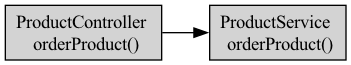

In [66]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph
dot = Digraph("Call Authorization", graph_attr={'rankdir': 'LR'})

# Add nodes with positions
dot.node("ProductController", "ProductController \n orderProduct()", shape="rect", style="filled")
dot.node("ProductService", "ProductService \n orderProduct()", shape="rect", style="filled")

dot.edge("ProductController", "ProductService")

# Render the graph
dot.render("./call_authorization", format="png", view=False)

Image("./call_authorization.png")

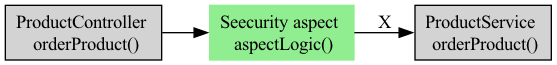

In [67]:
from graphviz import Digraph
from IPython.display import Image

# Create a new directed graph
dot = Digraph("Enable Call Authorization", graph_attr={'rankdir': 'LR'})

# Add nodes with positions
dot.node("ProductController", "ProductController \n orderProduct()", shape="rect", style="filled")
dot.node("Securityaspect", "Seecurity aspect \n aspectLogic()", shape="rect", style="filled", color="lightgreen")
dot.node("ProductService", "ProductService \n orderProduct()", shape="rect", style="filled")

dot.edge("ProductController", "Securityaspect")
dot.edge("Securityaspect", "ProductService", "X")

# Render the graph
dot.render("./enable_call_authorization", format="png", view=False)

Image("./enable_call_authorization.png")

When we enable method security, an aspect intercepts hte calls to the service method. If the sepecified authorization rules aren't fulfilled, the aspect doesn't forward the call to the service method.

There are 2 types of call authorixation
- Preauthorization: The framework checks the authorization rules before the method call.
- Postauthorization: The framework checks the authorixation rules after the method executes.

To enable method level security
add `@EnableMethodSecurity` annotation to your security config
```
@Configuration
@EnableMethodSecurity
public class ProjectConfig {
 ...
}
```

User the `@PreAuthorize` annotation on your mthoed
```
@Service
public class NameService {
    @PreAuthorize("hasAuthority('write')")
    public String getName() {
        return "Fantastico";
    }
}
```

The above defines that only user having write authority can call the getName() method.


## Redirect on Success

```
@Bean
public SecurityFilterChain securityFilterChain(HttpSecurity http)
 throws Exception {
 http.formLogin(c -> c.defaultSuccessUrl("/home", true));

 http.authorizeHttpRequests(c -> c.anyRequest().authenticated());
 return http.build();
}
```

```
@Component
public class CustomAuthenticationSuccessHandler
 implements AuthenticationSuccessHandler {
 @Override
 public void onAuthenticationSuccess(
 HttpServletRequest httpServletRequest,
 HttpServletResponse httpServletResponse,
 Authentication authentication)
 throws IOException {

 var authorities = authentication.getAuthorities();
 var auth =
 authorities.stream()
 .filter(a -> a.getAuthority().equals("read"))
 .findFirst();
 if (auth.isPresent()) {
 httpServletResponse
 .sendRedirect("/home");
 } else {
 httpServletResponse
 .sendRedirect("/error");
 }
 }
}
```

```
@Configuration
public class ProjectConfig {
 private final CustomAuthenticationSuccessHandler
authenticationSuccessHandler;
 private final CustomAuthenticationFailureHandler
authenticationFailureHandler;

@Bean
public SecurityFilterChain configure(HttpSecurity http)
 throws Exception {

 http.formLogin(c ->
 c.successHandler(authenticationSuccessHandler)
 .failureHandler(authenticationFailureHandler)
 );
 http.authorizeHttpRequests(c -> c.anyRequest().authenticated());
 return http.build();
 }
}

# OpenId
OpenID Connect is a protocol that is built on top of the OAuth 2 specification.
- Specific value for scopes (such as profile or openid).
- Use of an extra token named ID token, used to store the details about the identity of the user and client to whom the token was issued.
- Usually the term grant type is referred to as flow when discussing it in terms of OIDC, when the authorization server was commonly called the identity provider or IdP.

Token is an access card (or key) a client gets fro mthe authorixation srver and uses it get authorized to call a use calse to access a specific resource on a secure backend (the resource server)

We classify tokens into 2 categores:
- Opaque: tokens that don't contain details about the suer and client for whom tehy are issued. For such tokens, a resource serve always needs to call the authorization server to validate the token and get the details it need to authorize the request. This request for the token validation is called introspection.
- Non-paque: tokens that contains details about the user and the client to whom they've been issued. The most common implementation of non-opaque tokens is the JSON Web Token (JWT).

- Thre are multiple flows in which a client app can ask the authorization srever for a token. These flows in which the token is issued are called grant types. The most common grant types are
- - The authorization code grant type
  - The client credentials grant type.

## Configuring OAuth2 client
pom.xml
```
<dependency>
    <groupId>org.springframework.boot</groupId>
    <artifactId>spring-boot-starter-oauth2-client
     </artifactId>
</dependency>
```

in your configuration
```
@Configuration
public class SecurityConfig {
    @Bean
    public SecurityFilterChain securityFilterChain(HttpSecurity http)
    throws Exception {

        http.oauth2Login(Customizer.withDefaults());
        http.authorizeHttpRequests(
        c -> c.anyRequest().authenticated());
        return http.build();
    }
}
```

you need to configure with the OAuth provider's
- `client-id`
- `client-secret`

oauth client
```
@Bean
public RegisteredClientRepository registeredClientRepository() {
 var registeredClient = RegisteredClient
 .withId(UUID.randomUUID().toString())
 .clientId("client")
 .clientSecret("secret")
 .clientAuthenticationMethod(
 ClientAuthenticationMethod.CLIENT_SECRET_BASIC)
 .authorizationGrantType(
 AuthorizationGrantType.AUTHORIZATION_CODE)
 .redirectUri(
Implementing OAuth 2 login 331
 "http://localhost:8080/login/oauth2/code/my_authorization_server")
 .scope(OidcScopes.OPENID)
 .build();
 return new InMemoryRegisteredClientRepository(registeredClient);
 }
```

bcrypt handles salting and keys

## JSSESSIONID
JSESSIONID is a unique identifier used by Java web applications to manage sessions. It plays a critical role in maintaining session state across multiple HTTP requests from a client.

### How JSESSIONID Works
1. `Session Creation`: When a suer first interacts with the application, a session is created on the server. The server generates a unique session ID and stores session related data in a designated storage mechanism.
2. `Session ID`: The server sends this session Id to the client, typically stored in a cookie. The client includes this session ID in subsequent requests, allowing the server to identify the session.
3. `Session Management`: Spring provides various ways to manage sessions, including in-memory storage, database storage, and distributed caches.

### Advangages of Server-Side Session Storage
- `Security`: Sensitive session data is stored on the server, reducing the risk of exposure or tampering by clients.
- `Scalability`: Using distributed caches or databases allowing session data to be managed across multiple server instance, supporting high-traffic applications.
- `Persistence`: Storing sessions in a database ensures that session data is not lost if the server restarts.

### Challanges
- `Scalability`: Managing sessions across multiple servers requires careful setup and configuration, especially in distributed environments.
- `Performance`: Accessing session data from a database or distributed cache may introduce latency comapared to in-memory storage.
- `Complexity`: Implementation and managing server-side session storage adds complexity to the application architecture.